## Implementation

# Data Understanding



Import Libraries
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


Reading data 

In [2]:
data = pd.read_csv("Data.csv",nrows=101)
data

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score,Top_1,Top_2,Top_3
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,2.0,4.0,5.0,...,7.0,7.0,7.0,6.0,7.0,5.0,Green,10,7,13
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,8.0,7.0,8.0,6.0,9.0,Blue,6,7,13
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,5.0,7.0,7.0,9.0,6.0,7.0,Green,1,5,7
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,7.0,7.0,8.0,7.5,6.5,9.0,Blue,19,16,13
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,7.0,6.0,8.0,NaN,NaN,Green,7,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,4.0,1.0,...,2.0,1.0,7.0,6.0,8.0,7.0,Gold,10,4,7
97,98,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,4.0,1.0,...,2.0,1.0,7.0,6.0,8.0,7.0,Green,10,4,7
98,99,Khaled Khatteb,Male,Business,Software developer,23,3.0,3.0,4.0,2.0,...,7.0,6.0,8.0,9.0,6.0,7.0,Gold,10,17,5
99,101,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,1.0,3.0,1.0,...,5.0,6.0,5.0,8.0,4.0,4.0,Gold,10,17,7


In [3]:
data.dtypes

Id                     int64
Name                  object
Gender                object
Field                 object
Occupation            object
Age                    int64
Openness             float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Interface_1          float64
Interface_2          float64
Interface_3          float64
Interface_4          float64
Interface_5          float64
Interface_6          float64
Interface_7          float64
Interface_8          float64
Interface_9          float64
Interface_10         float64
Interface_11         float64
Interface_12         float64
Interface_13         float64
Interface_14         float64
Interface_15         float64
Interface_16         float64
Interface_17         float64
Extra_interface_1    float64
Extra_interface_2    float64
Test_Score            object
Top_1                  int64
Top_2                  int64
Top_3                  int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 101 non-null    int64  
 1   Name               101 non-null    object 
 2   Gender             101 non-null    object 
 3   Field              101 non-null    object 
 4   Occupation         101 non-null    object 
 5   Age                101 non-null    int64  
 6   Openness           101 non-null    float64
 7   Extraversion       101 non-null    float64
 8   Agreeableness      101 non-null    float64
 9   Conscientiousness  101 non-null    float64
 10  Neuroticism        101 non-null    float64
 11  Interface_1        101 non-null    float64
 12  Interface_2        101 non-null    float64
 13  Interface_3        101 non-null    float64
 14  Interface_4        101 non-null    float64
 15  Interface_5        101 non-null    float64
 16  Interface_6        101 non

In [5]:
# data['Interface_9'] = data['Interface_9'].astype('float64')


In [6]:

# data['Neuroticism'] = data['Neuroticism'].astype('float64')

In [7]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.000000
Name                 0.000000
Gender               0.000000
Field                0.000000
Occupation           0.000000
Age                  0.000000
Openness             0.000000
Extraversion         0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Neuroticism          0.000000
Interface_1          0.000000
Interface_2          0.000000
Interface_3          0.000000
Interface_4          0.000000
Interface_5          0.000000
Interface_6          0.000000
Interface_7          0.000000
Interface_8          0.000000
Interface_9          0.000000
Interface_10         0.000000
Interface_11         0.000000
Interface_12         0.000000
Interface_13         0.000000
Interface_14         0.000000
Interface_15         0.000000
Interface_16         0.000000
Interface_17         0.000000
Extra_interface_1    6.930693
Extra_interface_2    6.930693
Test_Score           0.000000
Top_1                0.000000
Top_2                0.000000
Top_3     

In [8]:
data['Extra_interface_1'].fillna(value=data['Extra_interface_1'].mean(), inplace=True)

In [9]:
data['Extra_interface_2'].fillna(value=data['Extra_interface_2'].mean(), inplace=True)


In [10]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.0
Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Extra_interface_1    0.0
Extra_interface_2    0.0
Test_Score           0.0
Top_1                0.0
Top_2                0.0
Top_3                0.0
dtype: float64

In [11]:
data['Test_Score'] = pd.factorize(data['Test_Score'])[0]
data['Test_Score'] .unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [12]:
data.describe()


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,...,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score,Top_1,Top_2,Top_3
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.00000,101.000000
mean,51.019802,22.188119,4.019802,3.287129,3.524752,2.648515,3.351485,6.871287,6.061386,6.043564,...,6.514851,6.490099,7.118812,7.978218,6.102128,6.161702,1.623762,9.564356,10.80198,10.435644
std,29.334274,5.942580,0.851237,1.253688,0.881409,1.439695,1.231959,1.686199,1.920571,1.970960,...,2.269863,2.303237,1.725034,1.760375,2.030467,2.054220,1.075653,4.517557,5.28965,5.378505
min,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.800000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000
25%,26.000000,20.000000,3.000000,2.000000,3.000000,1.000000,3.000000,6.000000,5.000000,5.000000,...,5.000000,5.000000,6.000000,7.000000,5.000000,5.000000,1.000000,7.000000,7.00000,7.000000
50%,51.000000,21.000000,4.000000,3.000000,4.000000,3.000000,3.000000,7.000000,6.000000,6.000000,...,7.000000,7.000000,7.000000,8.000000,6.102128,6.161702,2.000000,10.000000,11.00000,10.000000
75%,76.000000,21.000000,5.000000,4.000000,4.000000,4.000000,4.000000,8.000000,7.000000,7.000000,...,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,2.000000,13.000000,16.00000,16.000000
max,102.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,19.000000,19.00000,19.000000


# Machine learning 

In [13]:
y = data['Test_Score']
y
x = data.drop(['Test_Score','Name','Occupation','Gender','Field','Top_1','Top_2','Top_3','Id'],axis = 1)
x



,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,...,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2
0,21,3.0,2.0,4.0,5.0,4.0,6.0,6.0,5.0,5.0,...,8.0,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.000000,5.000000
1,21,4.0,5.0,3.0,2.0,1.0,8.0,7.0,7.0,6.0,...,8.0,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.000000,9.000000
2,23,5.0,4.0,3.0,3.0,3.0,9.0,8.5,7.0,6.0,...,9.0,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.000000,7.000000
3,20,4.0,3.0,5.0,5.0,1.0,6.0,5.5,5.0,6.0,...,5.5,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.500000,9.000000
4,19,4.0,2.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,...,7.0,6.0,4.0,8.0,6.0,7.0,6.0,8.0,6.102128,6.161702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,21,5.0,4.0,4.0,1.0,4.0,6.0,5.0,6.0,8.0,...,9.0,6.0,8.0,7.0,2.0,1.0,7.0,6.0,8.000000,7.000000
97,21,5.0,4.0,4.0,1.0,4.0,6.0,5.0,6.0,8.0,...,9.0,6.0,8.0,7.0,2.0,1.0,7.0,6.0,8.000000,7.000000
98,23,3.0,3.0,4.0,2.0,3.0,6.0,5.0,4.0,7.0,...,9.0,7.0,5.0,7.0,7.0,6.0,8.0,9.0,6.000000,7.000000
99,21,3.0,1.0,3.0,1.0,3.0,4.0,4.0,3.0,5.0,...,8.0,3.0,2.0,7.0,5.0,6.0,5.0,8.0,4.000000,4.000000


In [14]:
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=20)


Logistic 

In [15]:
lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)



In [16]:
accuracy_score(y_test, y_pred_lgr)*100


25.806451612903224

In [17]:
print(classification_report(y_test, y_pred_lgr))

              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.33      0.38      0.35         8
           2       0.27      0.36      0.31        11
           3       0.00      0.00      0.00         8

    accuracy                           0.26        31
   macro avg       0.20      0.25      0.22        31
weighted avg       0.21      0.26      0.23        31



Decision Tree

In [18]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)



In [19]:
accuracy_score(y_test, y_pred_tree)*100

29.03225806451613

In [20]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.22      0.50      0.31         4
           1       0.33      0.38      0.35         8
           2       0.36      0.36      0.36        11
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         0

    accuracy                           0.29        31
   macro avg       0.18      0.25      0.20        31
weighted avg       0.24      0.29      0.26        31



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

SVM

In [21]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)



In [22]:
accuracy_score(y_test, y_pred_svc)*100


35.483870967741936

In [23]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         8
           2       0.35      1.00      0.52        11
           3       0.00      0.00      0.00         8

    accuracy                           0.35        31
   macro avg       0.09      0.25      0.13        31
weighted avg       0.13      0.35      0.19        31



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Random forest

In [24]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)


In [25]:
accuracy_score(y_test, y_pred_rf)*100


25.806451612903224

In [26]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.33      0.38      0.35         8
           2       0.27      0.36      0.31        11
           3       0.00      0.00      0.00         8

    accuracy                           0.26        31
   macro avg       0.20      0.25      0.22        31
weighted avg       0.21      0.26      0.23        31



KNN

In [27]:
knn=KNeighborsClassifier(n_neighbors=30, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)



In [28]:
knn=KNeighborsClassifier(n_neighbors=30, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)

25.806451612903224

In [29]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         8
           2       0.31      0.73      0.43        11
           3       0.00      0.00      0.00         8

    accuracy                           0.26        31
   macro avg       0.08      0.18      0.11        31
weighted avg       0.11      0.26      0.15        31



Neural network


In [30]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
accuracy_score(y_test, y_pred_networks)*100


35.483870967741936

In [32]:
print(classification_report(y_test, y_pred_networks))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.38      0.38      0.38         8
           2       0.32      0.55      0.40        11
           3       0.00      0.00      0.00         8

    accuracy                           0.35        31
   macro avg       0.34      0.36      0.34        31
weighted avg       0.29      0.35      0.31        31



# Navias 

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)



In [34]:
accuracy_score(y_test, y_pred_nav)*100



9.67741935483871

In [35]:
print(classification_report(y_test, y_pred_nav))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.25      0.12      0.17         8
           2       0.08      0.09      0.09        11
           3       0.09      0.12      0.11         8

    accuracy                           0.10        31
   macro avg       0.11      0.09      0.09        31
weighted avg       0.12      0.10      0.10        31



In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg= XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)



16.129032258064516
29.03225806451613
32.25806451612903


In [37]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 25.81%


In [38]:
data_spl= data.drop(['Openness','Extraversion','Agreeableness','Conscientiousness','Neuroticism','Top_1','Top_2','Top_3'],axis = 1)
data_spl.head(5)

,Id,Name,Gender,Field,Occupation,Age,Interface_1,Interface_2,Interface_3,Interface_4,...,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score
0,1,Nouran khaled,Female,CS,Senior Student,21,6.0,6.0,5.0,5.0,...,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.000000,5.000000,0
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,8.0,7.0,7.0,6.0,...,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.000000,9.000000,1
2,3,Omaima Ahmed,Female,CS,Senior Student,23,9.0,8.5,7.0,6.0,...,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.000000,7.000000,0
3,4,Maryam Walid,Female,CS,Student,20,6.0,5.5,5.0,6.0,...,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.500000,9.000000,1
4,5,Yehia Sameh,Male,CS,Student,19,5.0,3.0,4.0,4.0,...,6.0,4.0,8.0,6.0,7.0,6.0,8.0,6.102128,6.161702,0


In [39]:

y = data_spl['Test_Score']
y
x = data_spl.drop(['Test_Score','Name','Occupation','Gender','Field','Id'],axis = 1)



In [40]:
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30,random_state=42)

In [41]:
lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)


In [42]:
accuracy_score(y_test, y_pred_lgr)*100

16.129032258064516

In [43]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)


In [44]:
accuracy_score(y_test, y_pred_tree)*100

25.806451612903224

In [45]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)*100

16.129032258064516

In [46]:
knn=KNeighborsClassifier(n_neighbors=30, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)

accuracy_score(y_test, y_pred_KNN)*100

22.58064516129032

In [47]:
ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg=XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)


19.35483870967742
29.03225806451613
16.129032258064516


In [48]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
print (accuracy_score(y_test, y_pred_rf)*100)


16.129032258064516


In [49]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


25.806451612903224

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)
accuracy_score(y_test, y_pred_nav)*100


25.806451612903224

In [51]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 19.35%


In [52]:
data_spl2= data.drop(['Top_1','Top_2','Top_3','Extraversion','Conscientiousness','Neuroticism','Interface_3','Interface_4','Interface_6','Interface_8','Interface_9','Interface_12','Interface_14','Interface_15','Extra_interface_1','Extra_interface_2'],axis = 1)
data_spl2

,Id,Name,Gender,Field,Occupation,Age,Openness,Agreeableness,Interface_1,Interface_2,Interface_5,Interface_7,Interface_10,Interface_11,Interface_13,Interface_16,Interface_17,Test_Score
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,4.0,6.0,6.0,6.0,7.0,8.0,6.0,8.0,7.0,6.0,0
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,3.0,8.0,7.0,8.0,9.0,8.0,8.0,9.0,7.0,8.0,1
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,3.0,9.0,8.5,9.0,9.0,9.0,8.0,8.0,7.0,9.0,0
3,4,Maryam Walid,Female,CS,Student,20,4.0,5.0,6.0,5.5,6.5,7.0,5.5,6.0,7.5,8.0,7.5,1
4,5,Yehia Sameh,Male,CS,Student,19,4.0,3.0,5.0,3.0,7.0,8.0,7.0,6.0,8.0,6.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,6.0,5.0,7.0,8.0,9.0,6.0,7.0,7.0,6.0,2
97,98,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,6.0,5.0,7.0,8.0,9.0,6.0,7.0,7.0,6.0,0
98,99,Khaled Khatteb,Male,Business,Software developer,23,3.0,4.0,6.0,5.0,8.0,8.0,9.0,7.0,7.0,8.0,9.0,2
99,101,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,3.0,4.0,4.0,5.0,7.0,8.0,3.0,7.0,5.0,8.0,2


In [53]:
y = data_spl2['Test_Score']
y
x = data_spl2.drop(['Test_Score','Name','Occupation','Field','Gender','Id'],axis = 1)
x


,Age,Openness,Agreeableness,Interface_1,Interface_2,Interface_5,Interface_7,Interface_10,Interface_11,Interface_13,Interface_16,Interface_17
0,21,3.0,4.0,6.0,6.0,6.0,7.0,8.0,6.0,8.0,7.0,6.0
1,21,4.0,3.0,8.0,7.0,8.0,9.0,8.0,8.0,9.0,7.0,8.0
2,23,5.0,3.0,9.0,8.5,9.0,9.0,9.0,8.0,8.0,7.0,9.0
3,20,4.0,5.0,6.0,5.5,6.5,7.0,5.5,6.0,7.5,8.0,7.5
4,19,4.0,3.0,5.0,3.0,7.0,8.0,7.0,6.0,8.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,21,5.0,4.0,6.0,5.0,7.0,8.0,9.0,6.0,7.0,7.0,6.0
97,21,5.0,4.0,6.0,5.0,7.0,8.0,9.0,6.0,7.0,7.0,6.0
98,23,3.0,4.0,6.0,5.0,8.0,8.0,9.0,7.0,7.0,8.0,9.0
99,21,3.0,3.0,4.0,4.0,5.0,7.0,8.0,3.0,7.0,5.0,8.0


In [54]:
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33,random_state=42)

In [55]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

17.647058823529413

In [56]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)*100

20.588235294117645

In [57]:
knn=KNeighborsClassifier(n_neighbors=30, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)

accuracy_score(y_test, y_pred_KNN)*100

32.35294117647059

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)
accuracy_score(y_test, y_pred_nav)*100

26.47058823529412

[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

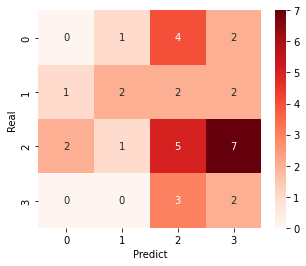

In [59]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_nav)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")


In [60]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 23.53%


In [61]:
ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg=XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)


32.35294117647059
17.647058823529413
23.52941176470588


In [62]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
accuracy_score(y_test, y_pred_rf)*100


23.52941176470588

In [63]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


29.411764705882355

In [64]:
lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test) 

accuracy_score(y_test, y_pred_lgr)*100

32.35294117647059